## Dataset Link: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

from scipy.stats import zscore

In [ ]:
# load and read the data

cc_df = pd.read_csv("/kaggle/input/creditcardfraud/credit_card_fraud.csv")
cc_df.shape

(284807, 31)

In [3]:
# see max columns

pd.set_option('display.max_columns', None)

In [4]:
# head

cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# info

cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# description

cc_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,2.240150e-15,1.724421e-15,-1.245415e-15,8.238900e-16,1.213481e-15,4.866699e-15,1.432227e-15,-3.768179e-16,9.707851e-16,1.036249e-15,6.386744e-16,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# check dups

cc_df.duplicated().sum()

1081

In [8]:
# drop dups

cc_df.drop_duplicates(inplace=True)
cc_df.duplicated().sum()

0

In [9]:
# check nulls

cc_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# unique

cc_df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [11]:
# covariance matrix

cc_df.cov()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,2.254450e+09,10907.541254,-825.310423,-30233.317533,-7107.160553,11325.631587,-4001.877710,4974.253249,-2138.715669,-408.915563,1587.857916,-12021.659489,5927.148068,-3117.446950,-4535.505980,-8010.007845,468.206419,-2952.999546,3590.504213,1140.709426,-1865.329311,1578.108933,4944.564658,1524.355202,-458.777551,-5772.779294,-957.153660,-97.172643,-144.925555,-125536.378255,-23.940600
V1,1.090754e+04,3.794806,0.022054,-0.023840,0.006219,-0.018874,0.001071,-0.021938,-0.002683,0.003901,0.001709,0.002040,-0.002952,-0.001101,-0.004939,-0.001074,-0.005694,-0.005729,-0.005767,0.001456,-0.002089,0.003973,-0.002027,-0.001616,-0.000853,-0.000226,-0.000642,-0.012108,-0.003106,-112.241834,-0.007509
V2,-8.253104e+02,0.022054,2.711631,0.013113,-0.003482,0.011814,-0.001304,0.015010,0.005629,-0.000494,0.001100,-0.001062,0.003712,0.001114,0.004251,0.002317,0.005773,0.004501,0.003415,-0.000480,-0.001632,-0.005838,0.001476,-0.003959,0.000699,-0.001347,0.000201,0.004923,0.000870,-219.950237,0.005685
V3,-3.023332e+04,-0.023840,0.013113,2.276121,0.006035,-0.014290,-0.003037,-0.021710,-0.003228,-0.005915,-0.015642,0.003595,-0.008854,0.000170,-0.004349,-0.001698,-0.005840,-0.010371,-0.004415,-0.000019,-0.002635,0.003822,-0.000300,0.000423,-0.000066,0.000334,-0.000069,-0.004210,-0.000066,-80.242788,-0.011222
V4,-7.107161e+03,0.006219,-0.003482,0.006035,1.999916,0.003397,-0.001658,0.008085,0.001485,0.003338,0.004191,-0.001762,0.004734,0.000250,0.003771,0.000740,0.004135,0.004355,0.002753,-0.000645,0.000346,-0.001058,0.000118,0.000646,-0.000103,0.000119,0.000530,0.000740,0.000107,35.239110,0.007461
V5,1.132563e+04,-0.018874,0.011814,-0.014290,0.003397,1.896152,-0.001719,-0.014722,0.002323,-0.001830,-0.008967,0.000577,-0.003207,0.000026,-0.001312,-0.001475,-0.002855,-0.005181,-0.003096,0.000489,-0.001256,0.001617,-0.000557,0.001016,0.000165,0.000050,0.000259,-0.003160,-0.000370,-133.674696,-0.004933
V6,-4.001878e+03,0.001071,-0.001304,-0.003037,-0.001658,-0.001719,1.774039,0.000713,0.004767,-0.001071,-0.003125,-0.000286,-0.001570,0.000527,0.000233,-0.000573,0.000142,-0.001926,0.000603,0.000115,-0.000186,-0.002057,0.001065,-0.000628,0.000970,0.000484,-0.000018,0.000152,0.000404,72.168839,-0.002386
V7,4.974253e+03,-0.021938,0.015010,-0.021710,0.008085,-0.014722,0.000713,1.507159,-0.009292,-0.006619,-0.017995,0.003070,-0.007514,-0.000208,-0.004460,-0.001565,-0.006376,-0.009096,-0.004399,0.000845,-0.001127,0.008007,-0.002028,0.002529,-0.000286,-0.000046,0.000369,-0.002204,0.000667,123.087955,-0.008632
V8,-2.138716e+03,-0.002683,0.005629,-0.003228,0.001485,0.002323,0.004767,-0.009292,1.390169,0.001341,0.000610,0.005631,-0.005176,-0.001621,-0.009416,0.001126,-0.004507,-0.005539,-0.001307,-0.000600,0.000246,0.016125,-0.005259,0.003672,0.000080,0.000007,-0.000800,0.000286,-0.000038,-30.899728,0.001591
V9,-4.089156e+02,0.003901,-0.000494,-0.005915,0.003338,-0.001830,-0.001071,-0.006619,0.001341,1.200104,-0.014873,-0.000242,-0.002598,0.000812,0.002067,-0.000284,-0.000083,-0.002139,-0.000342,0.000220,-0.001550,0.000538,0.000623,0.000462,-0.000068,-0.000157,0.000662,0.003564,0.002009,-12.103276,-0.004202


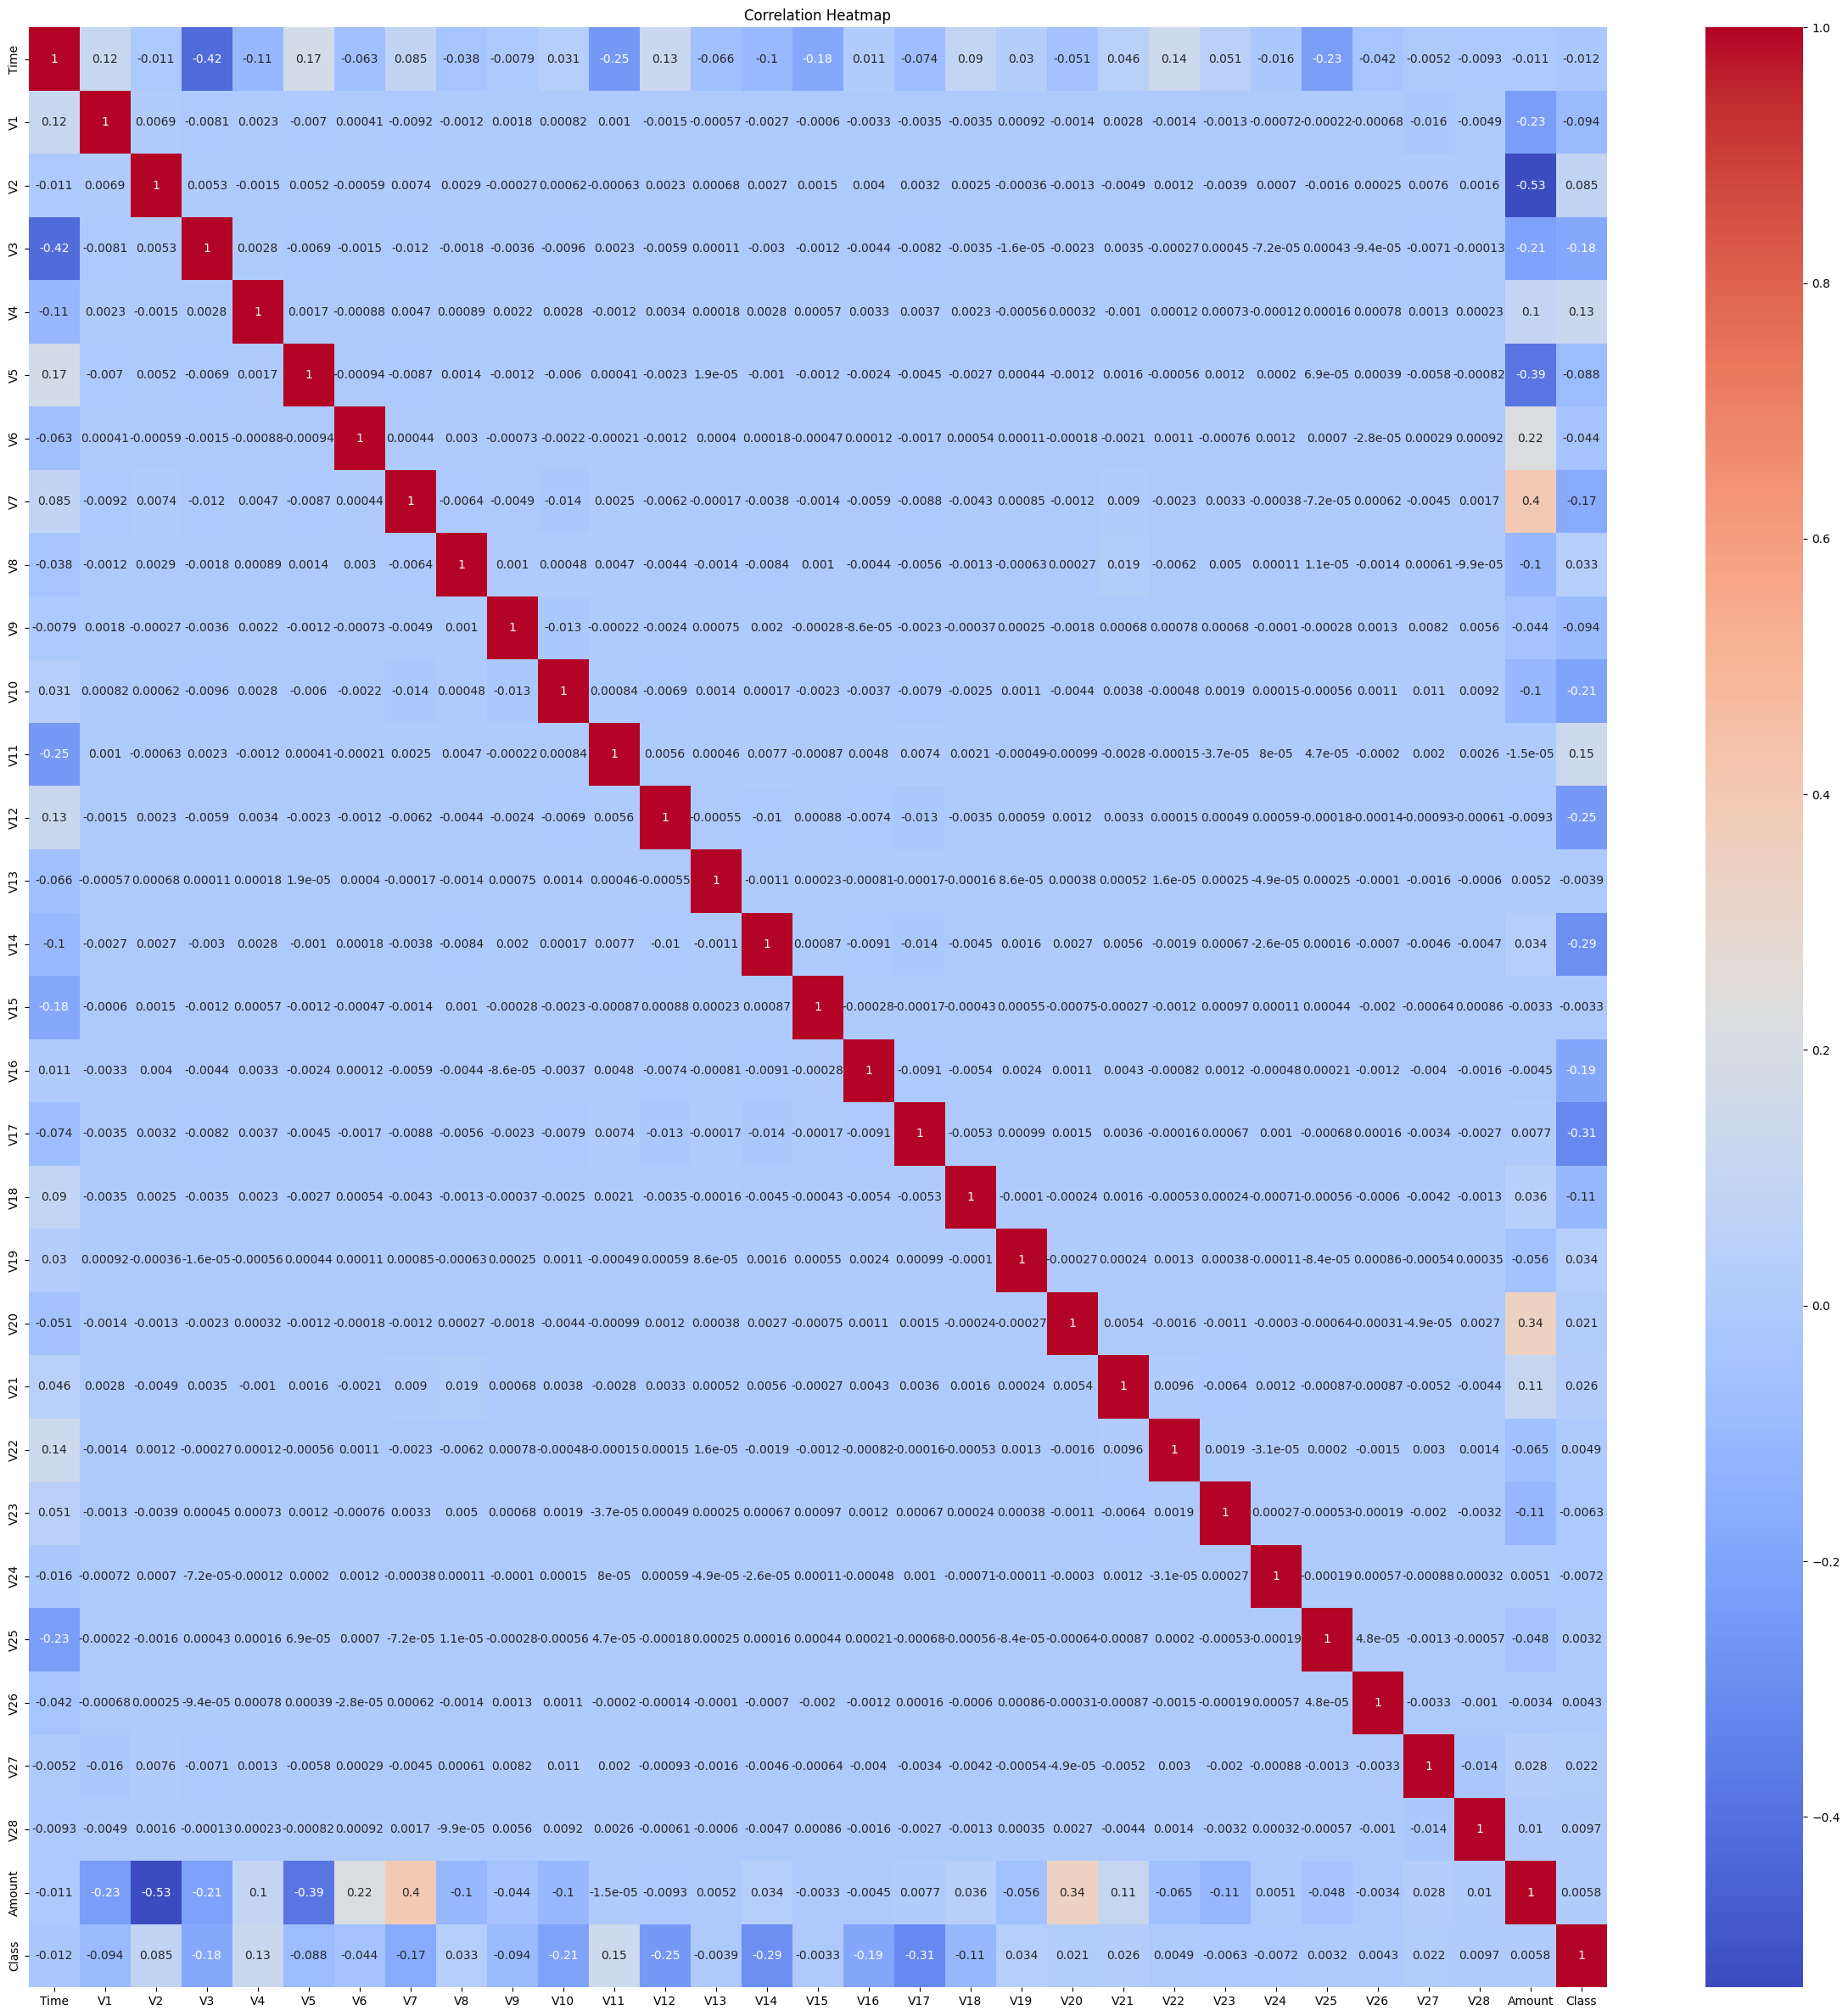

In [12]:
# corr heat map

mat = cc_df.corr()

plt.figure(figsize=(30,30))
sns.heatmap(mat, annot=True, cmap='coolwarm', linewidths=0.)
plt.title('Correlation Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 2500x2600 with 0 Axes>

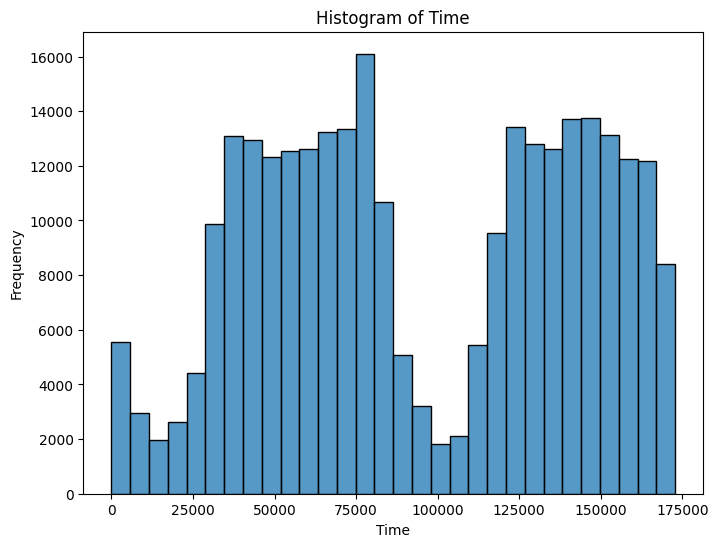

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


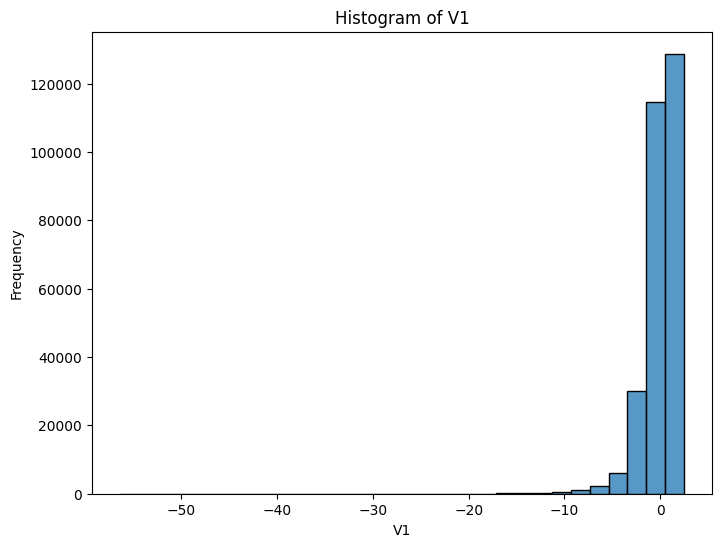

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


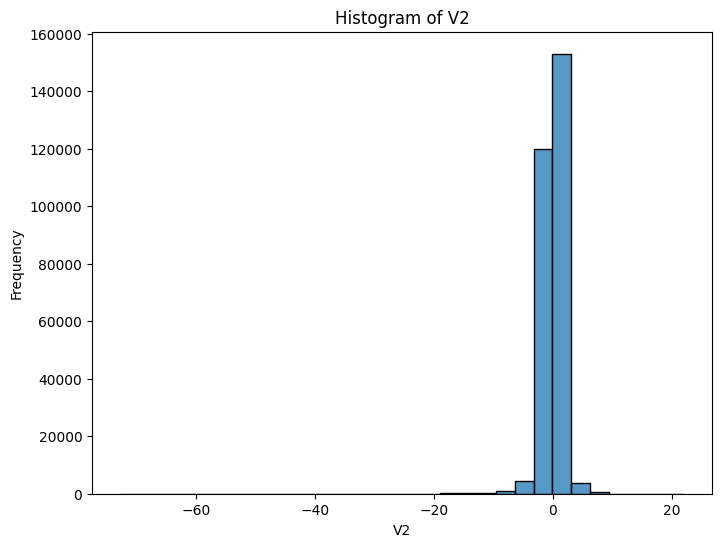

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


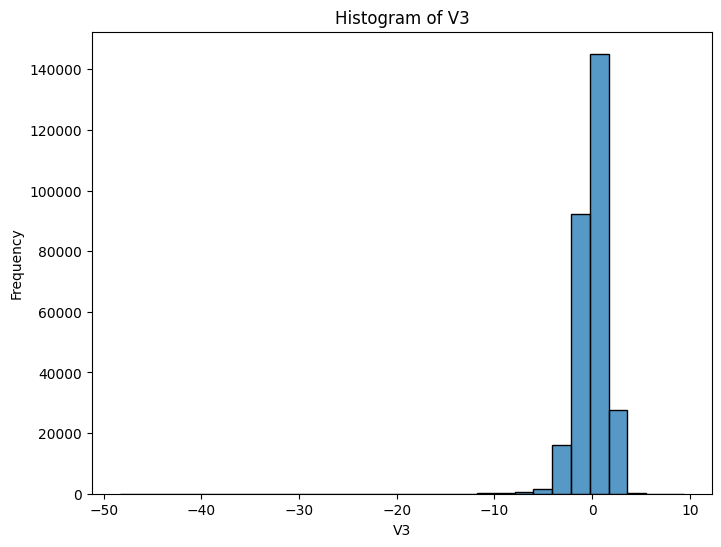

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


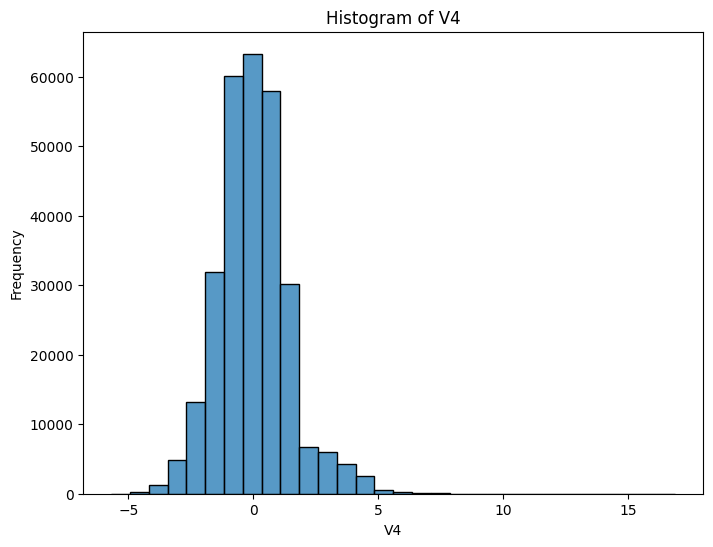

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


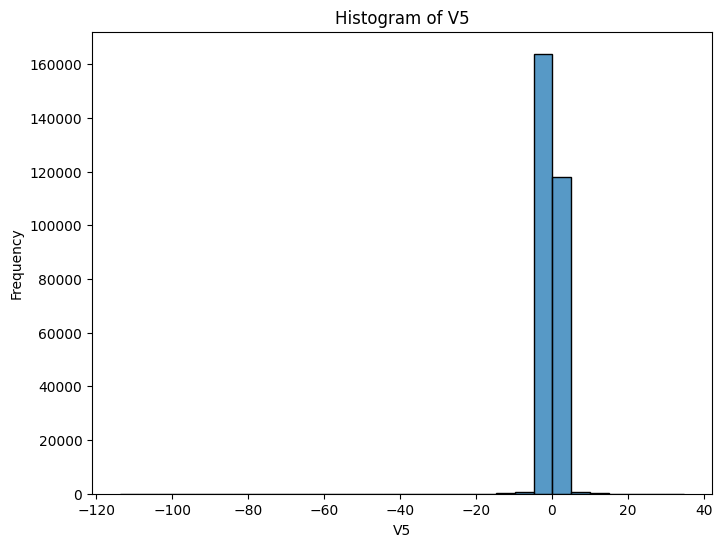

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


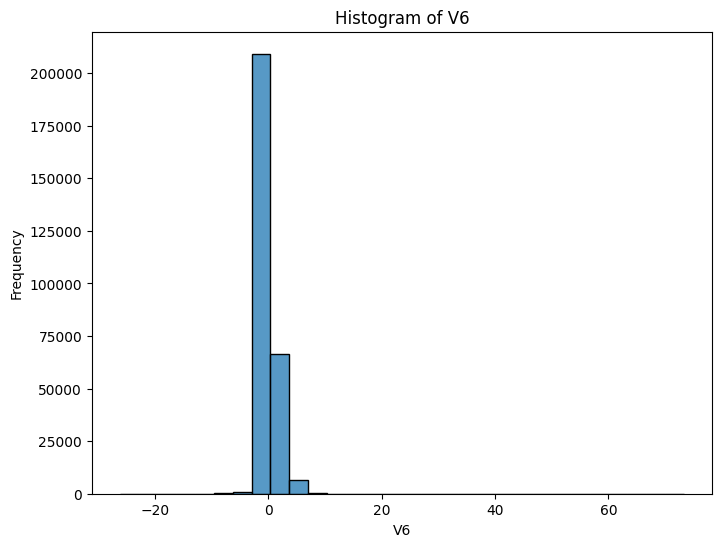

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


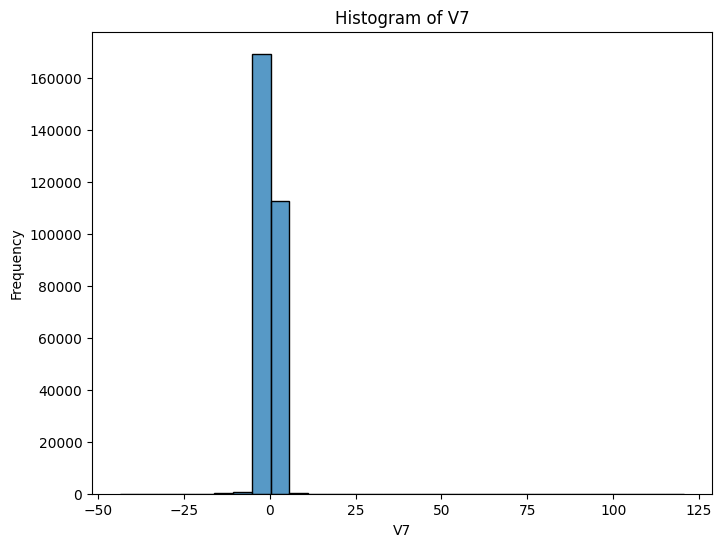

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


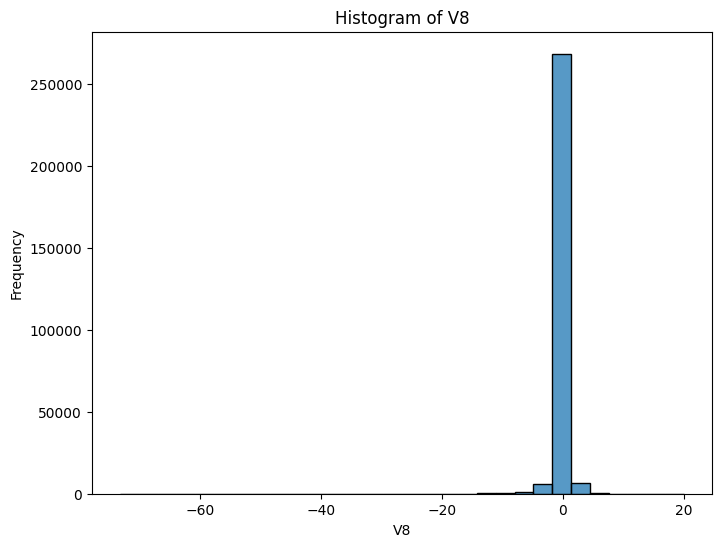

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


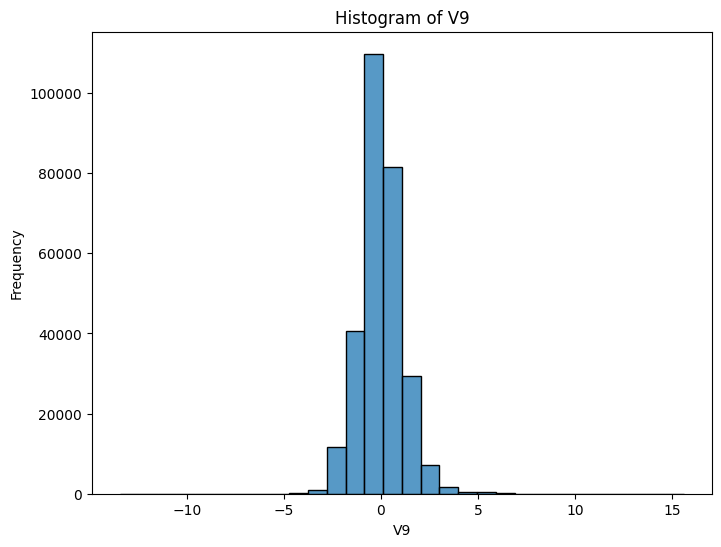

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


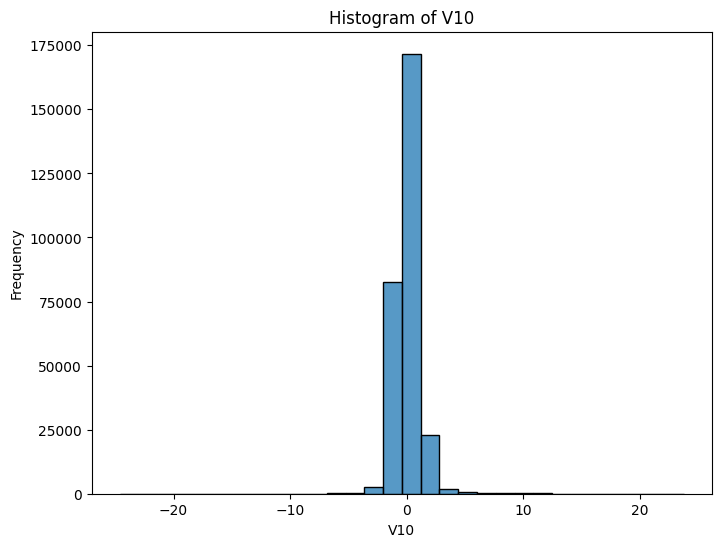

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


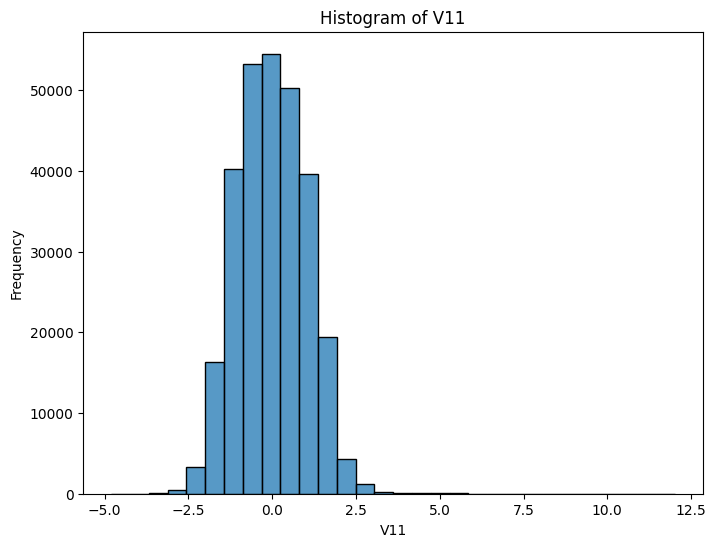

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


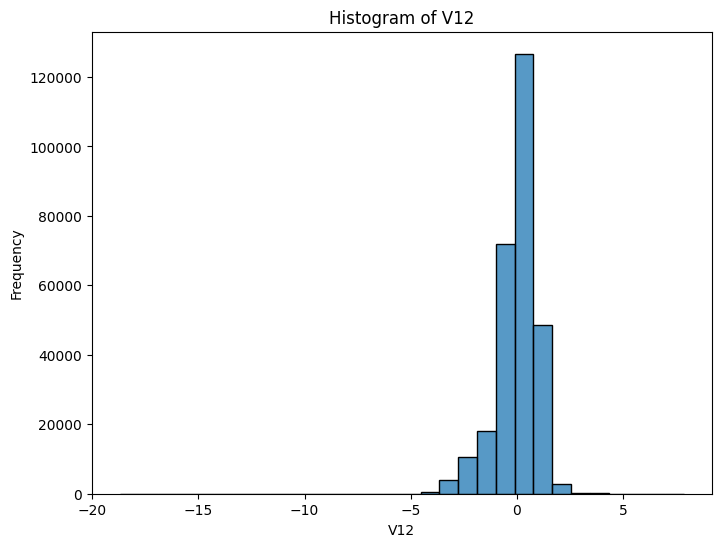

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


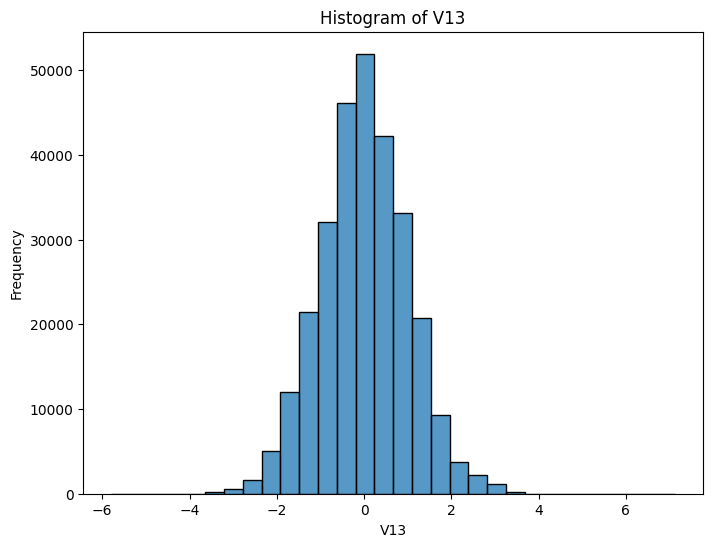

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


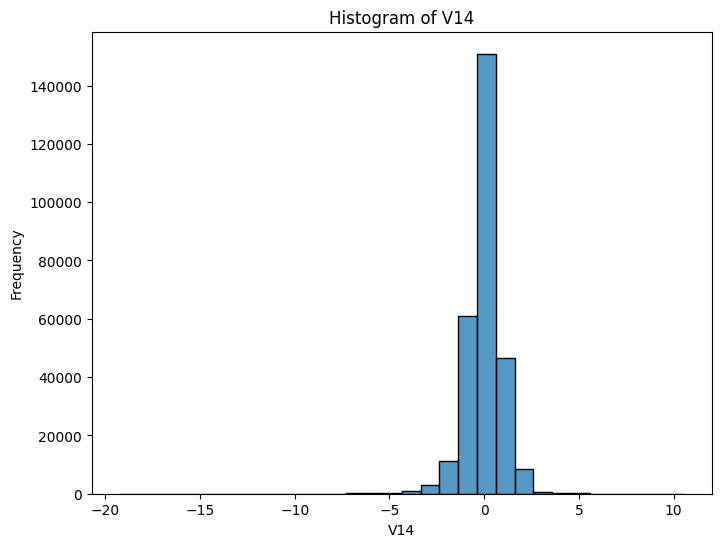

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


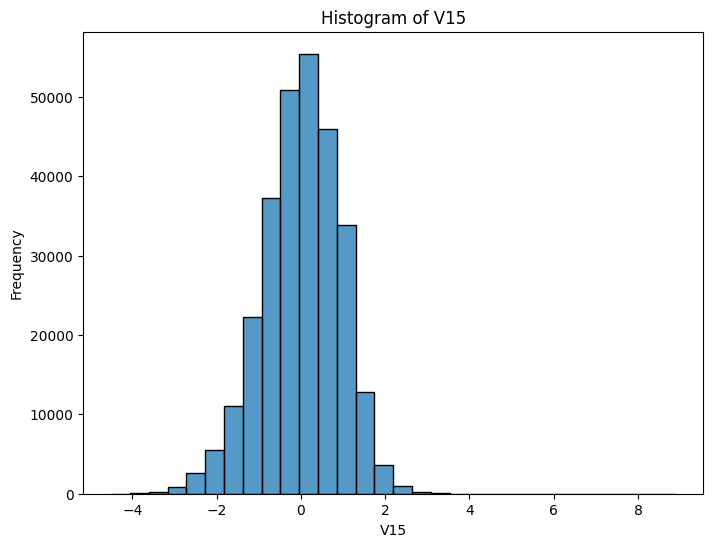

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


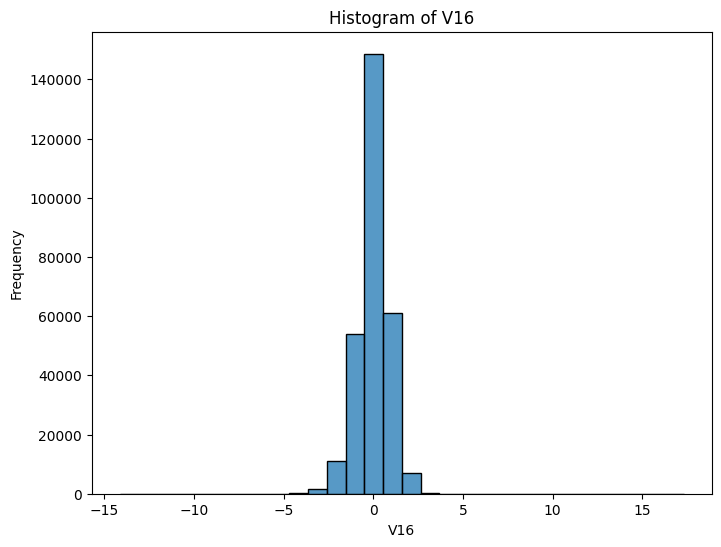

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


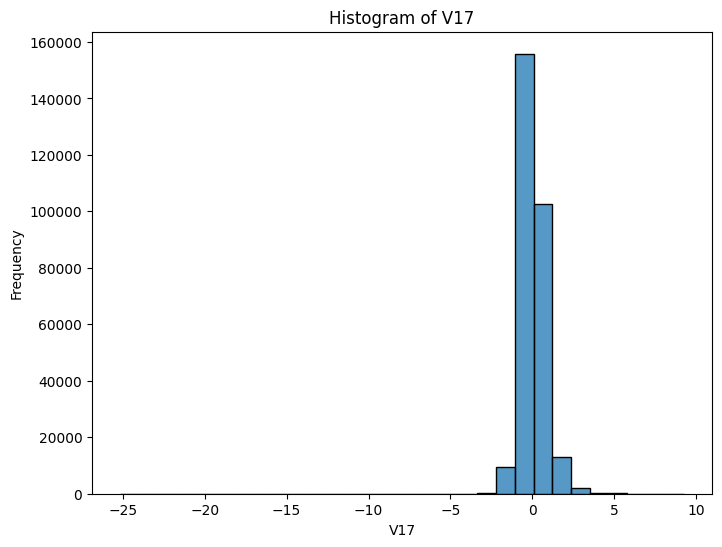

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


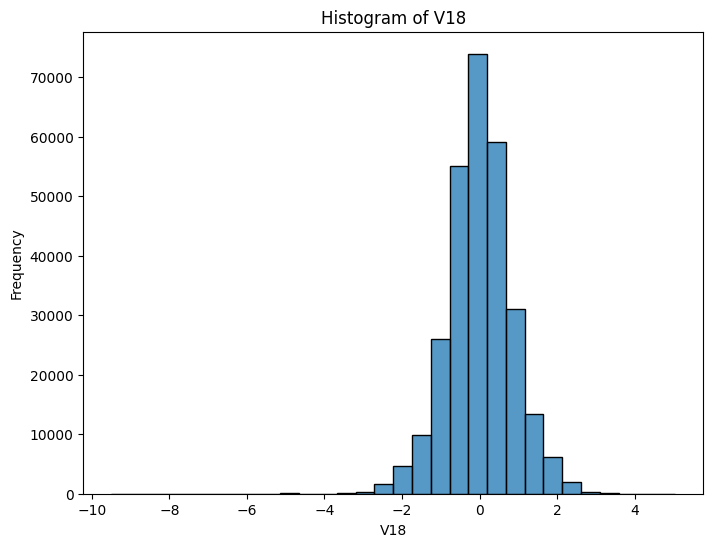

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


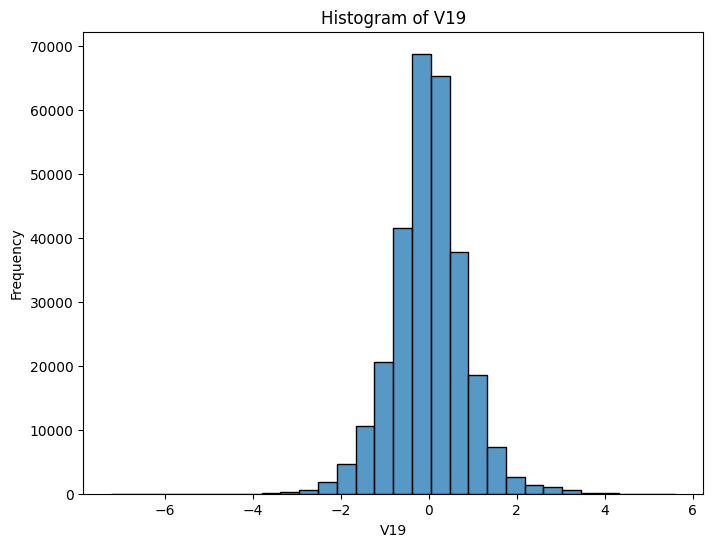

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


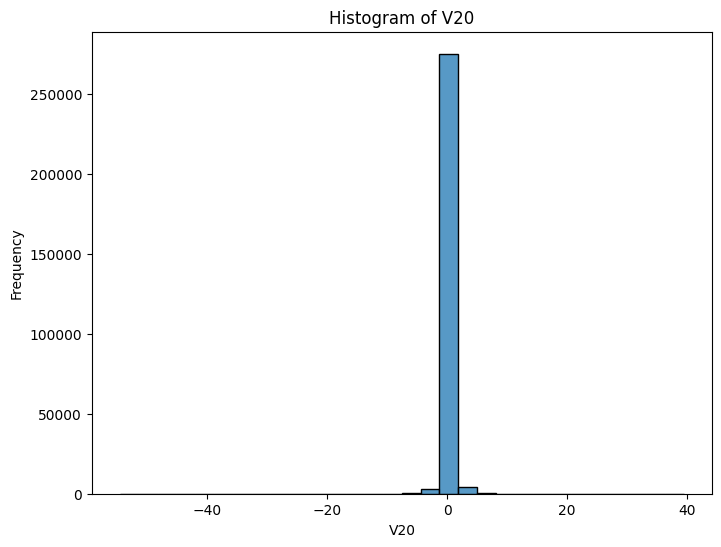

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


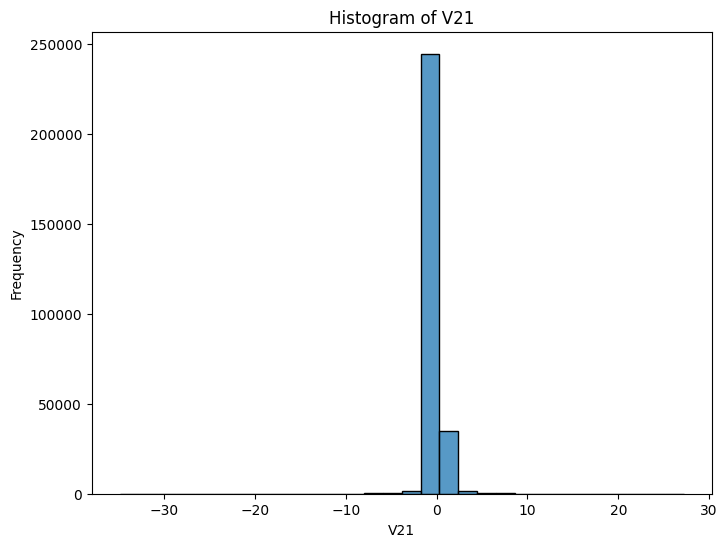

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


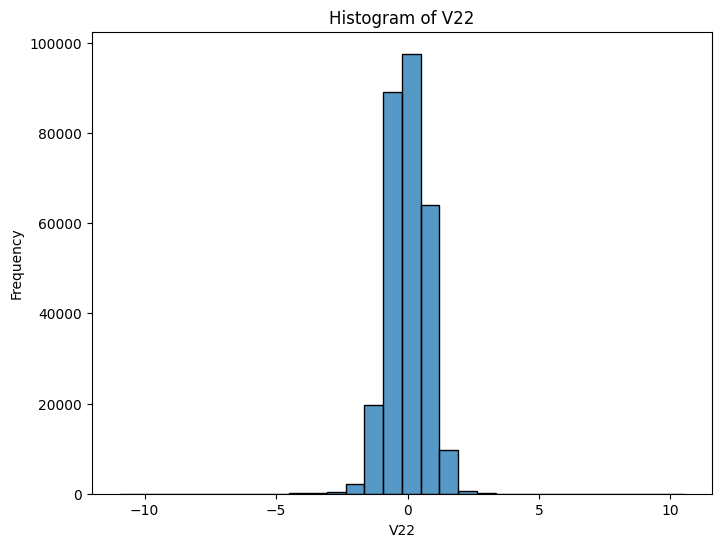

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


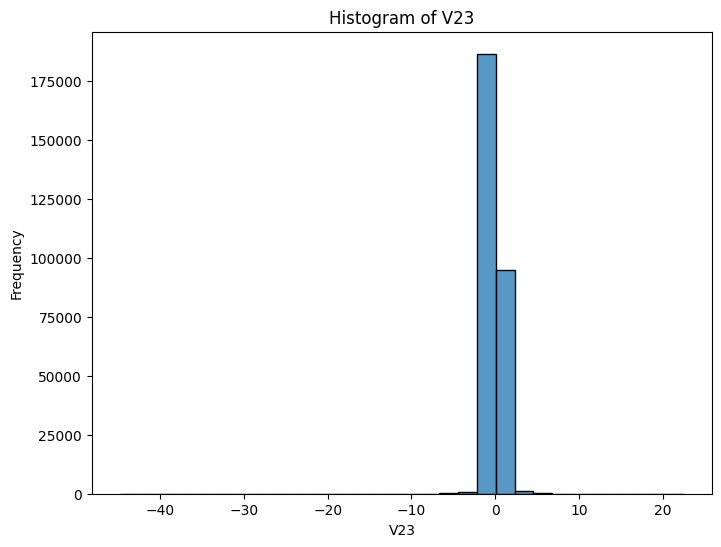

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


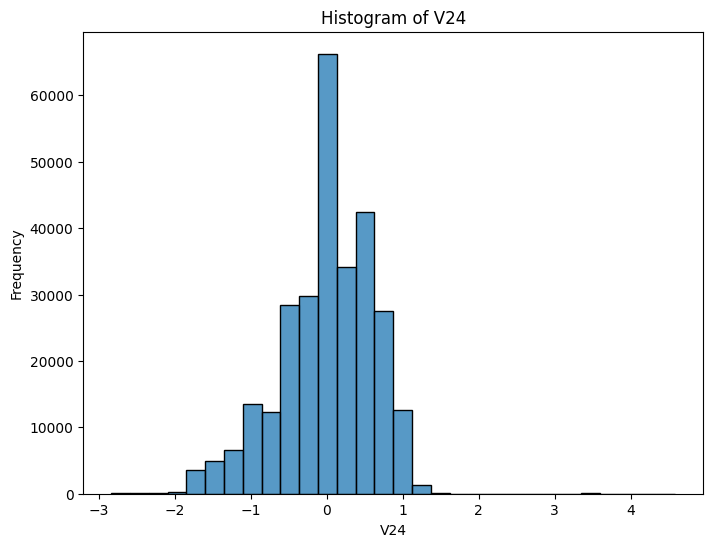

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


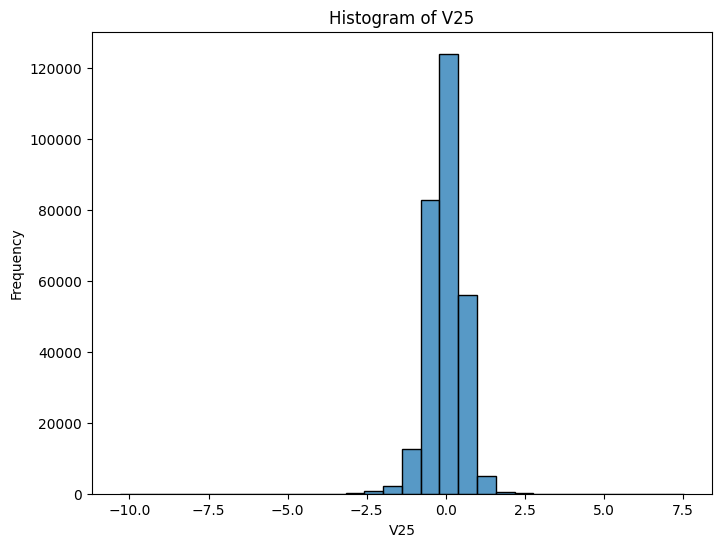

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


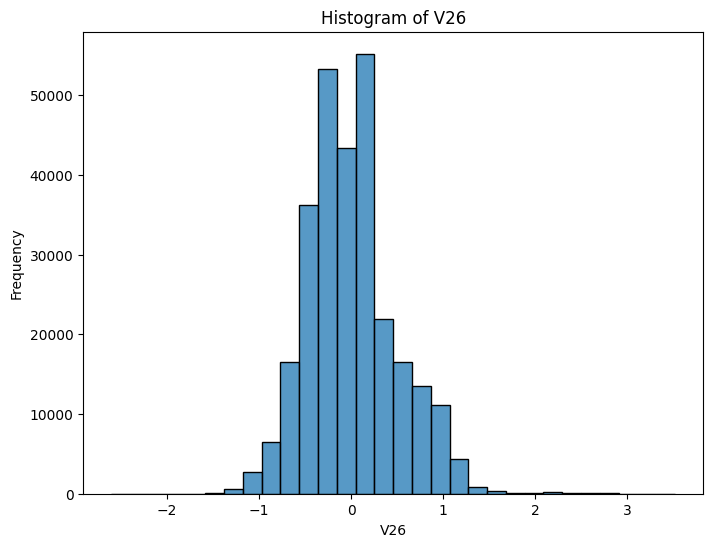

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


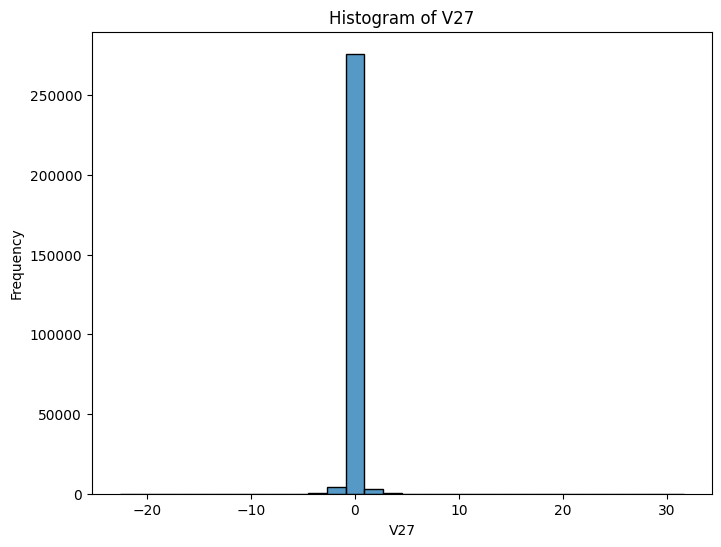

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


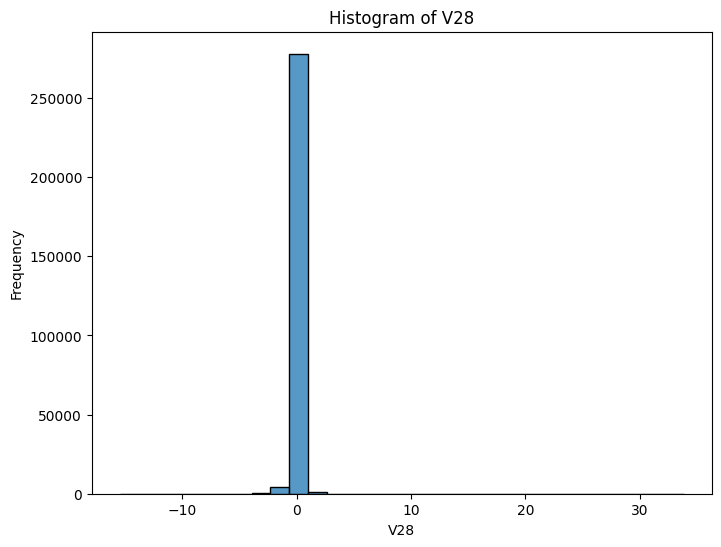

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


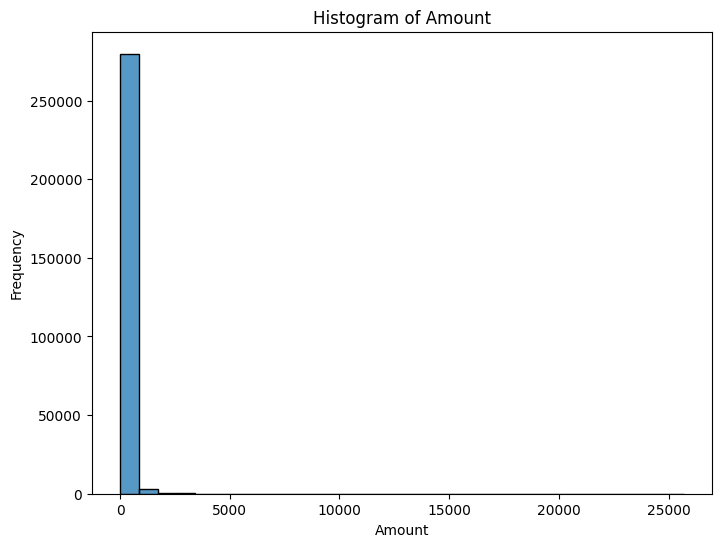

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


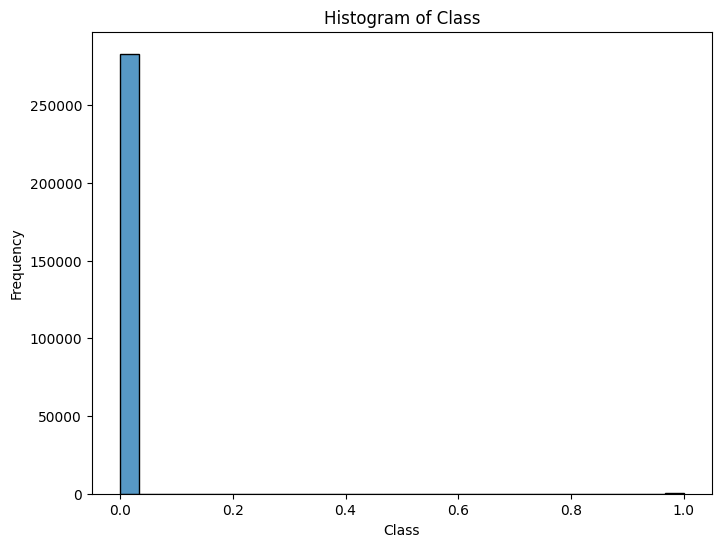

In [13]:
# Plot histogram for each numerical feature in cc_df

plt.figure(figsize=(25, 26))

numerical_columns = cc_df.select_dtypes(include=['number']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(cc_df[col], kde=False, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

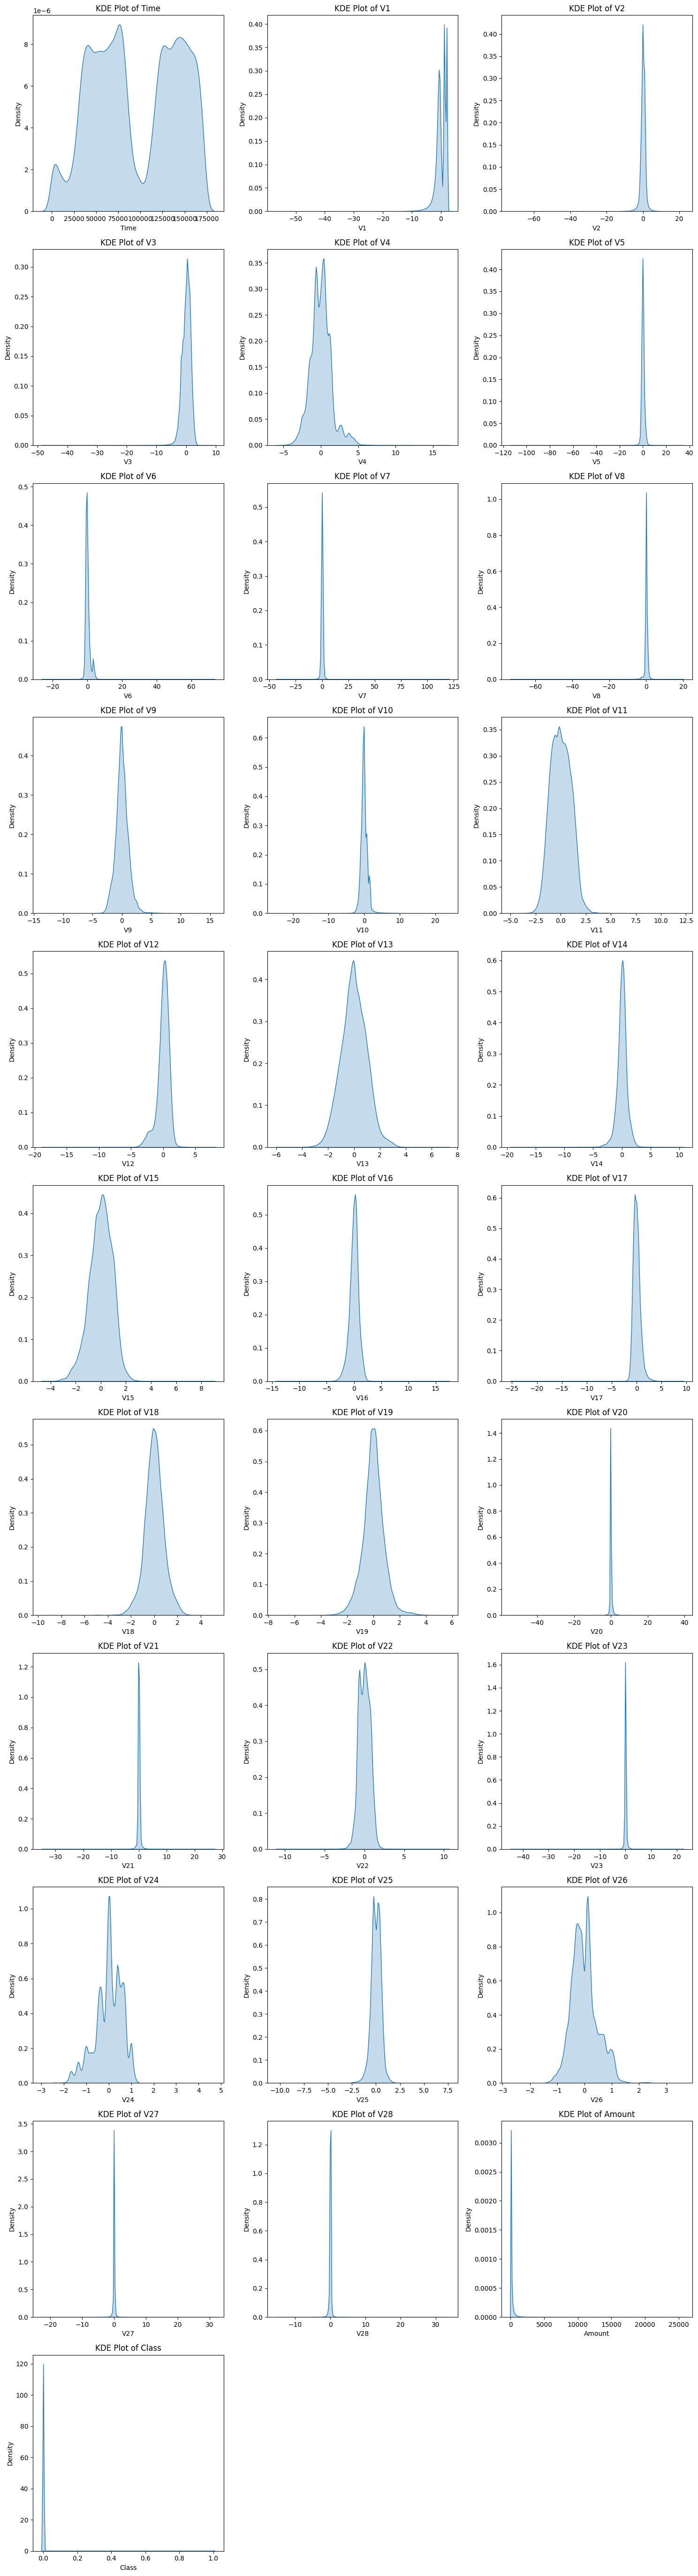

In [14]:
# KDE plot for each

numerical_columns = cc_df.select_dtypes(include=['number']).columns

#rows and columns for subplot grid
n_cols = 3  
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  

# subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
axes = axes.flatten()  

for i, col in enumerate(numerical_columns):
    sns.kdeplot(cc_df[col], fill=True, ax=axes[i])  
    axes[i].set_title(f'KDE Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


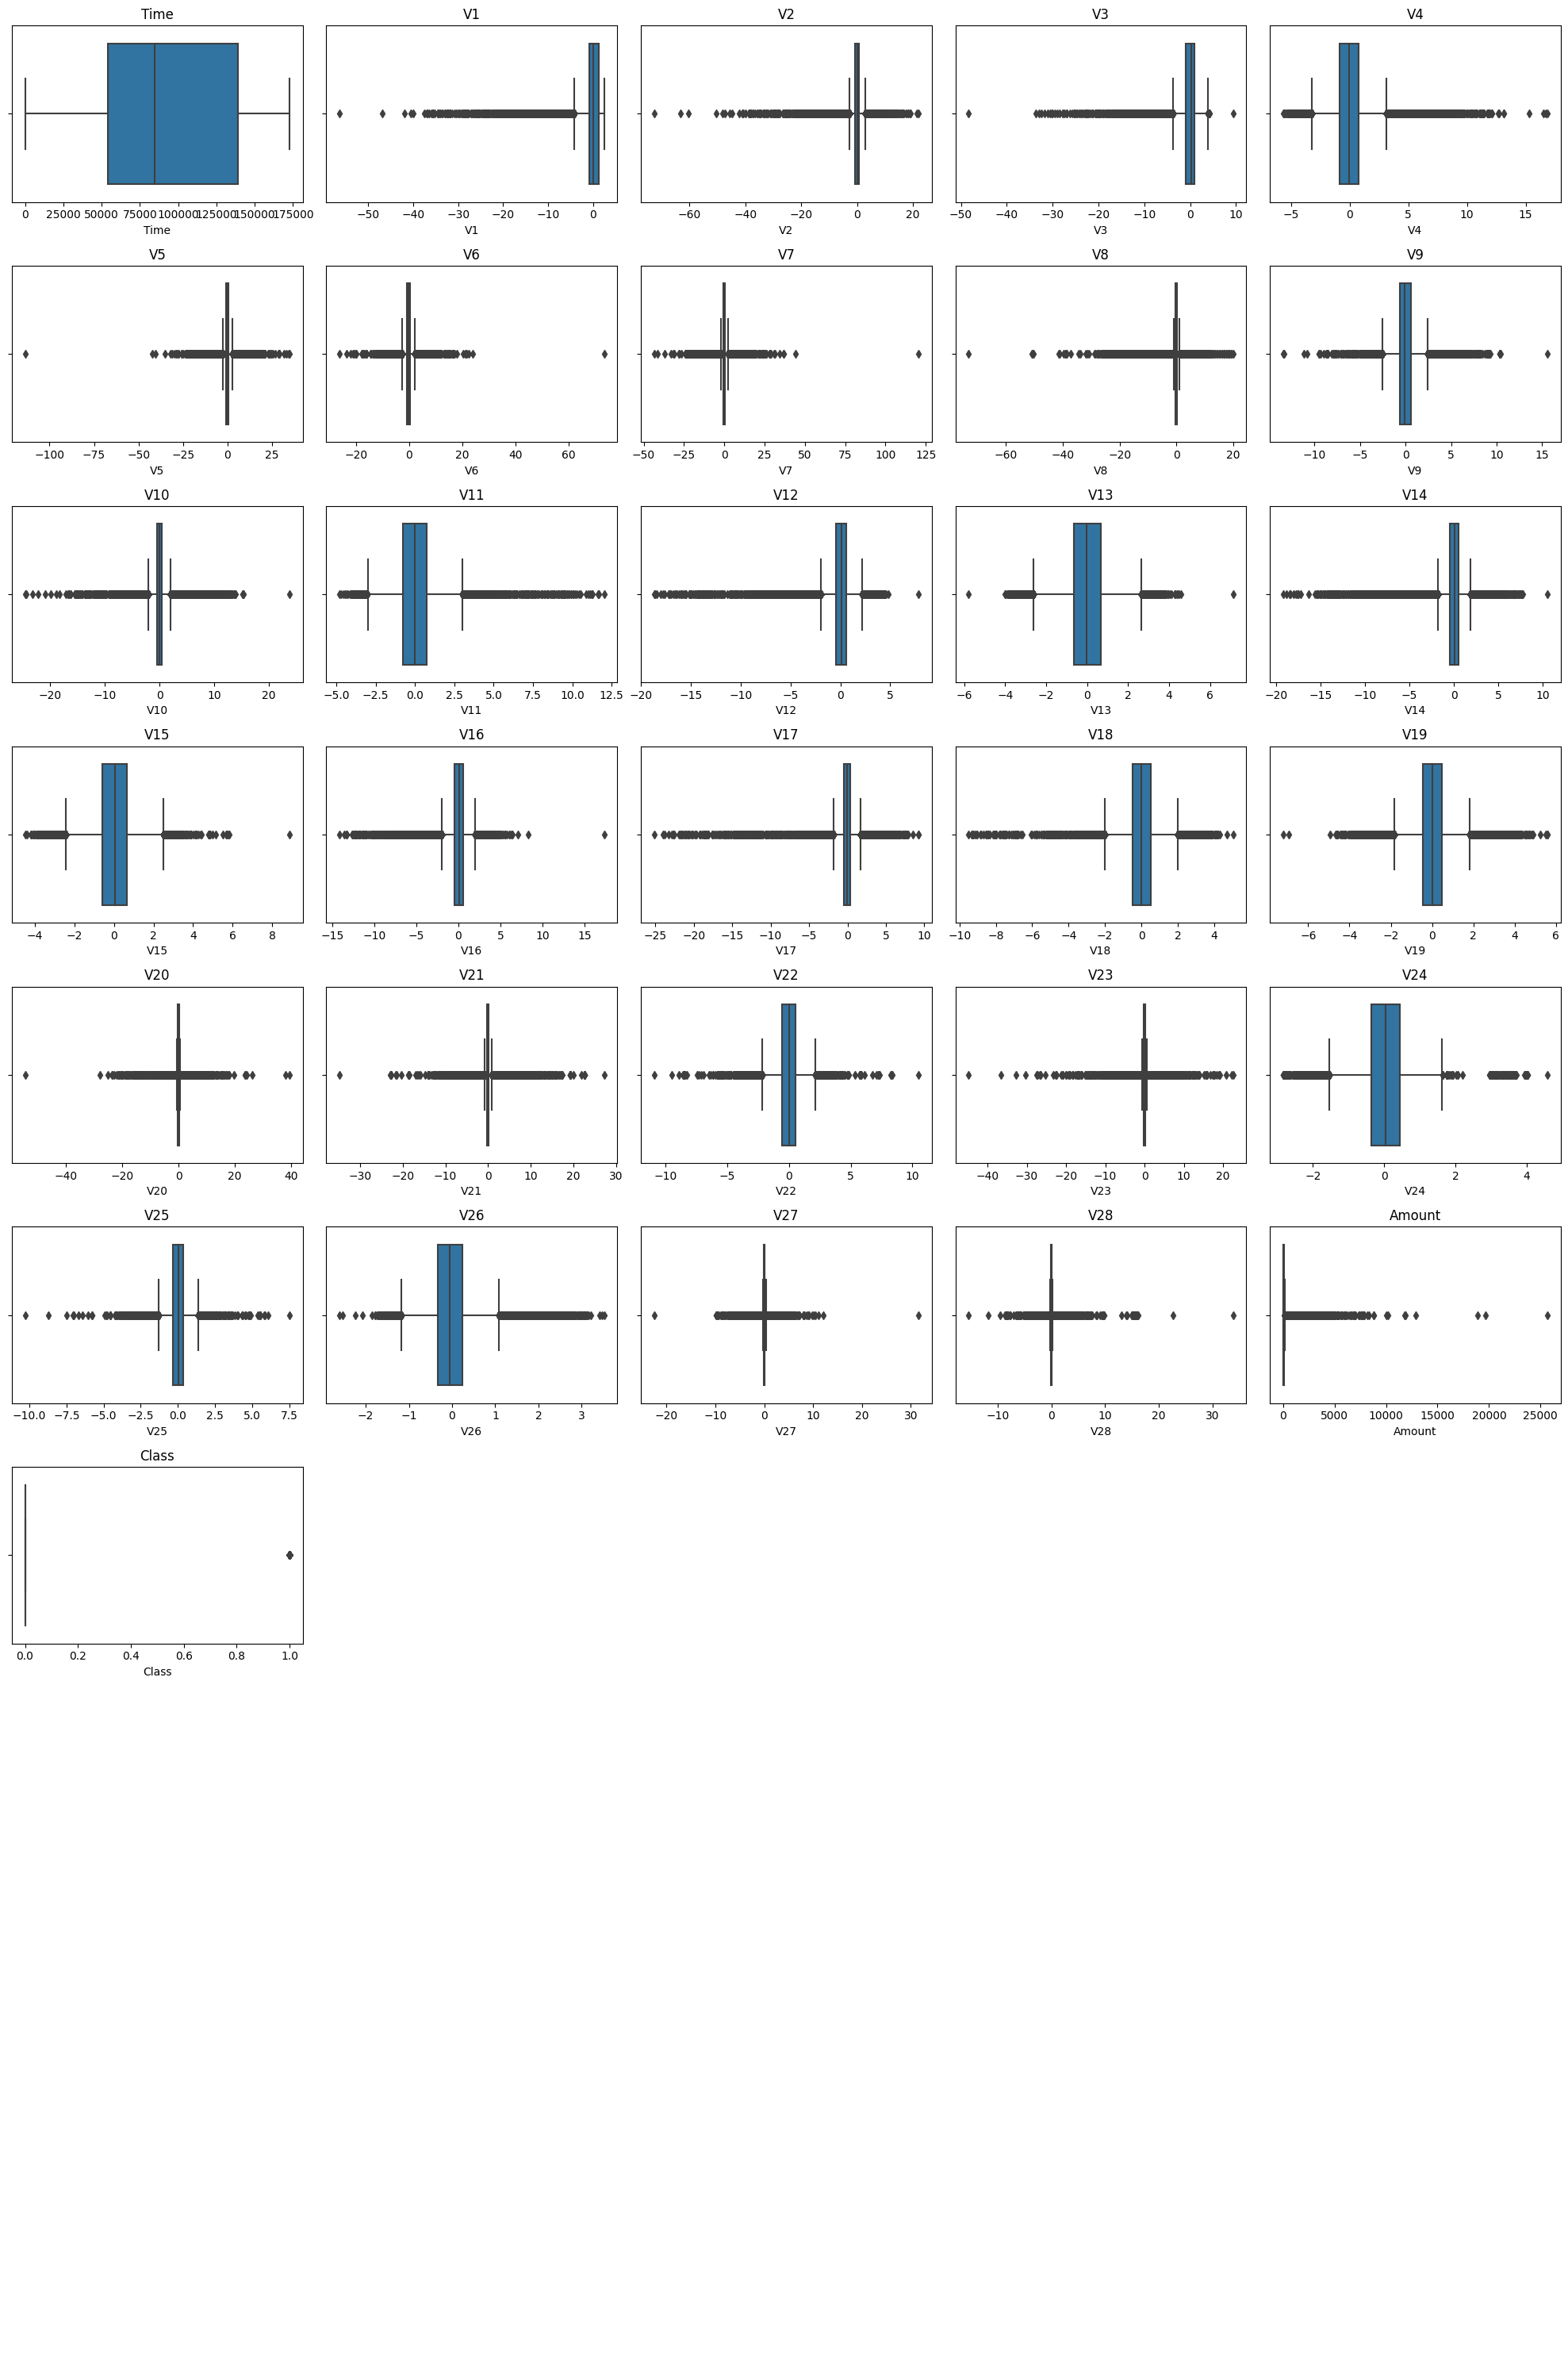

In [15]:
# box plots

fig, axs = plt.subplots(10, 5, figsize=(20, 30))
axs = axs.flatten()

for i, column in enumerate(cc_df.columns):
    sns.boxplot(x=cc_df[column], ax=axs[i])
    axs[i].set_title(column)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [16]:
# Normalization of features

from sklearn.preprocessing import RobustScaler

# Init the scaler
robust_scaler = RobustScaler()

# Fit and transform
cc_df[['Time', 'Amount']] = robust_scaler.fit_transform(cc_df[['Time', 'Amount']])

In [17]:
cc_df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

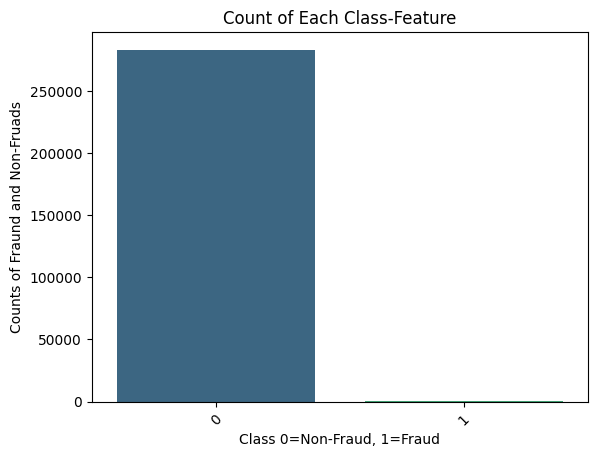

In [18]:
# 'Class' plot

sns.countplot(data=cc_df, x='Class',palette='viridis')
plt.title('Count of Each Class-Feature')
plt.xlabel('Class 0=Non-Fraud, 1=Fraud')
plt.ylabel('Counts of Fraund and Non-Fruads')
plt.xticks(rotation=45)
plt.show()

In [19]:
# split and Under sampling the split only-train data

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# init X and y
X = cc_df.drop('Class', axis=1)
y = cc_df['Class']

# Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# undersampling on training data ONLY
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Printing X and y shapes
print('X Shape:', X.shape)
print('y Shape:', y.shape)

print('X Columns:', X.columns.tolist())

print("======================================================================")

# Train Data
print('X_train_resampled Shape:', X_train_resampled.shape)
print('y_train_resampled Shape:', y_train_resampled.shape)

print('X_train_resampled Columns:', X_train_resampled.columns.tolist())
print('y_train_resampled first 5 values:', y_train_resampled.head())

print("======================================================================")

# Test Data
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

print('X_test Columns:', X_test.columns.tolist())
print('y_test first 5 values:', y_test.head())


X Shape: (283726, 30)
y Shape: (283726,)
X Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
X_train_resampled Shape: (756, 30)
y_train_resampled Shape: (756,)
X_train_resampled Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
y_train_resampled first 5 values: 227442    0
218717    0
76902     0
86663     0
167195    0
Name: Class, dtype: int64
X_test Shape: (56746, 30)
y_test Shape: (56746,)
X_test Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
y_test first 5 values: 86568     0
251557    0
2023

In [20]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
# libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),  # `verbose=0` is better than `verbose=False`
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
}

# store results
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)

    # Predictions
    y_train_pred = model.predict(X_train_resampled)  
    y_test_pred = model.predict(X_test)

    # Evaluate Train dataset
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    train_precision = precision_score(y_train_resampled, y_train_pred, average="binary")
    train_recall = recall_score(y_train_resampled, y_train_pred, average="binary")
    train_f1 = f1_score(y_train_resampled, y_train_pred, average="binary")

    # Evaluate Test dataset
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average="binary")
    test_recall = recall_score(y_test, y_test_pred, average="binary")
    test_f1 = f1_score(y_test, y_test_pred, average="binary")

    # Store results
    model_list.append(name)
    accuracy_list.append(test_accuracy)
    precision_list.append(test_precision)
    recall_list.append(test_recall)
    f1_list.append(test_f1)

    # Print evaluation results
    print(f"Model: {name}")
    print("Model Performance for Training Set:")
    print(f"- Accuracy: {train_accuracy:.4f}")
    print(f"- Precision: {train_precision:.4f}")
    print(f"- Recall: {train_recall:.4f}")
    print(f"- F1 Score: {train_f1:.4f}")

    print("\nModel Performance for Test Set:")
    print(f"- Accuracy: {test_accuracy:.4f}")
    print(f"- Precision: {test_precision:.4f}")
    print(f"- Recall: {test_recall:.4f}")
    print(f"- F1 Score: {test_f1:.4f}")

    print("=" * 40)
    print("\n")


Model: Logistic Regression
Model Performance for Training Set:
- Accuracy: 0.9471
- Precision: 0.9747
- Recall: 0.9180
- F1 Score: 0.9455

Model Performance for Test Set:
- Accuracy: 0.9725
- Precision: 0.0509
- Recall: 0.8737
- F1 Score: 0.0962


Model: Decision Tree
Model Performance for Training Set:
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000

Model Performance for Test Set:
- Accuracy: 0.9128
- Precision: 0.0173
- Recall: 0.9158
- F1 Score: 0.0340


Model: Random Forest
Model Performance for Training Set:
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000

Model Performance for Test Set:
- Accuracy: 0.9836
- Precision: 0.0812
- Recall: 0.8526
- F1 Score: 0.1482


Model: XGBoost
Model Performance for Training Set:
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000

Model Performance for Test Set:
- Accuracy: 0.9718
- Precision: 0.0490
- Recall: 0.8632
- F1 Score: 0.0928


[LightGBM] [Info] Number of posi

In [22]:
# creating classification report for all models

results_dict = {
    "Model": model_list,
    "Accuracy": accuracy_list,
    "Precision": precision_list,
    "Recall": recall_list,
    "F1 Score": f1_list
}

results_df = pd.DataFrame(results_dict)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.972509   0.050889  0.873684  0.096176
1        Decision Tree  0.912787   0.017303  0.915789  0.033964
2        Random Forest  0.983594   0.081162  0.852632  0.148216
3              XGBoost  0.971751   0.049043  0.863158  0.092813
4             LightGBM  0.971804   0.049131  0.863158  0.092971
5             CatBoost  0.981796   0.075181  0.873684  0.138449
6    Gradient Boosting  0.968491   0.044157  0.863158  0.084016
7             AdaBoost  0.956332   0.032562  0.873684  0.062784
8  K-Nearest Neighbors  0.976280   0.057325  0.852632  0.107427


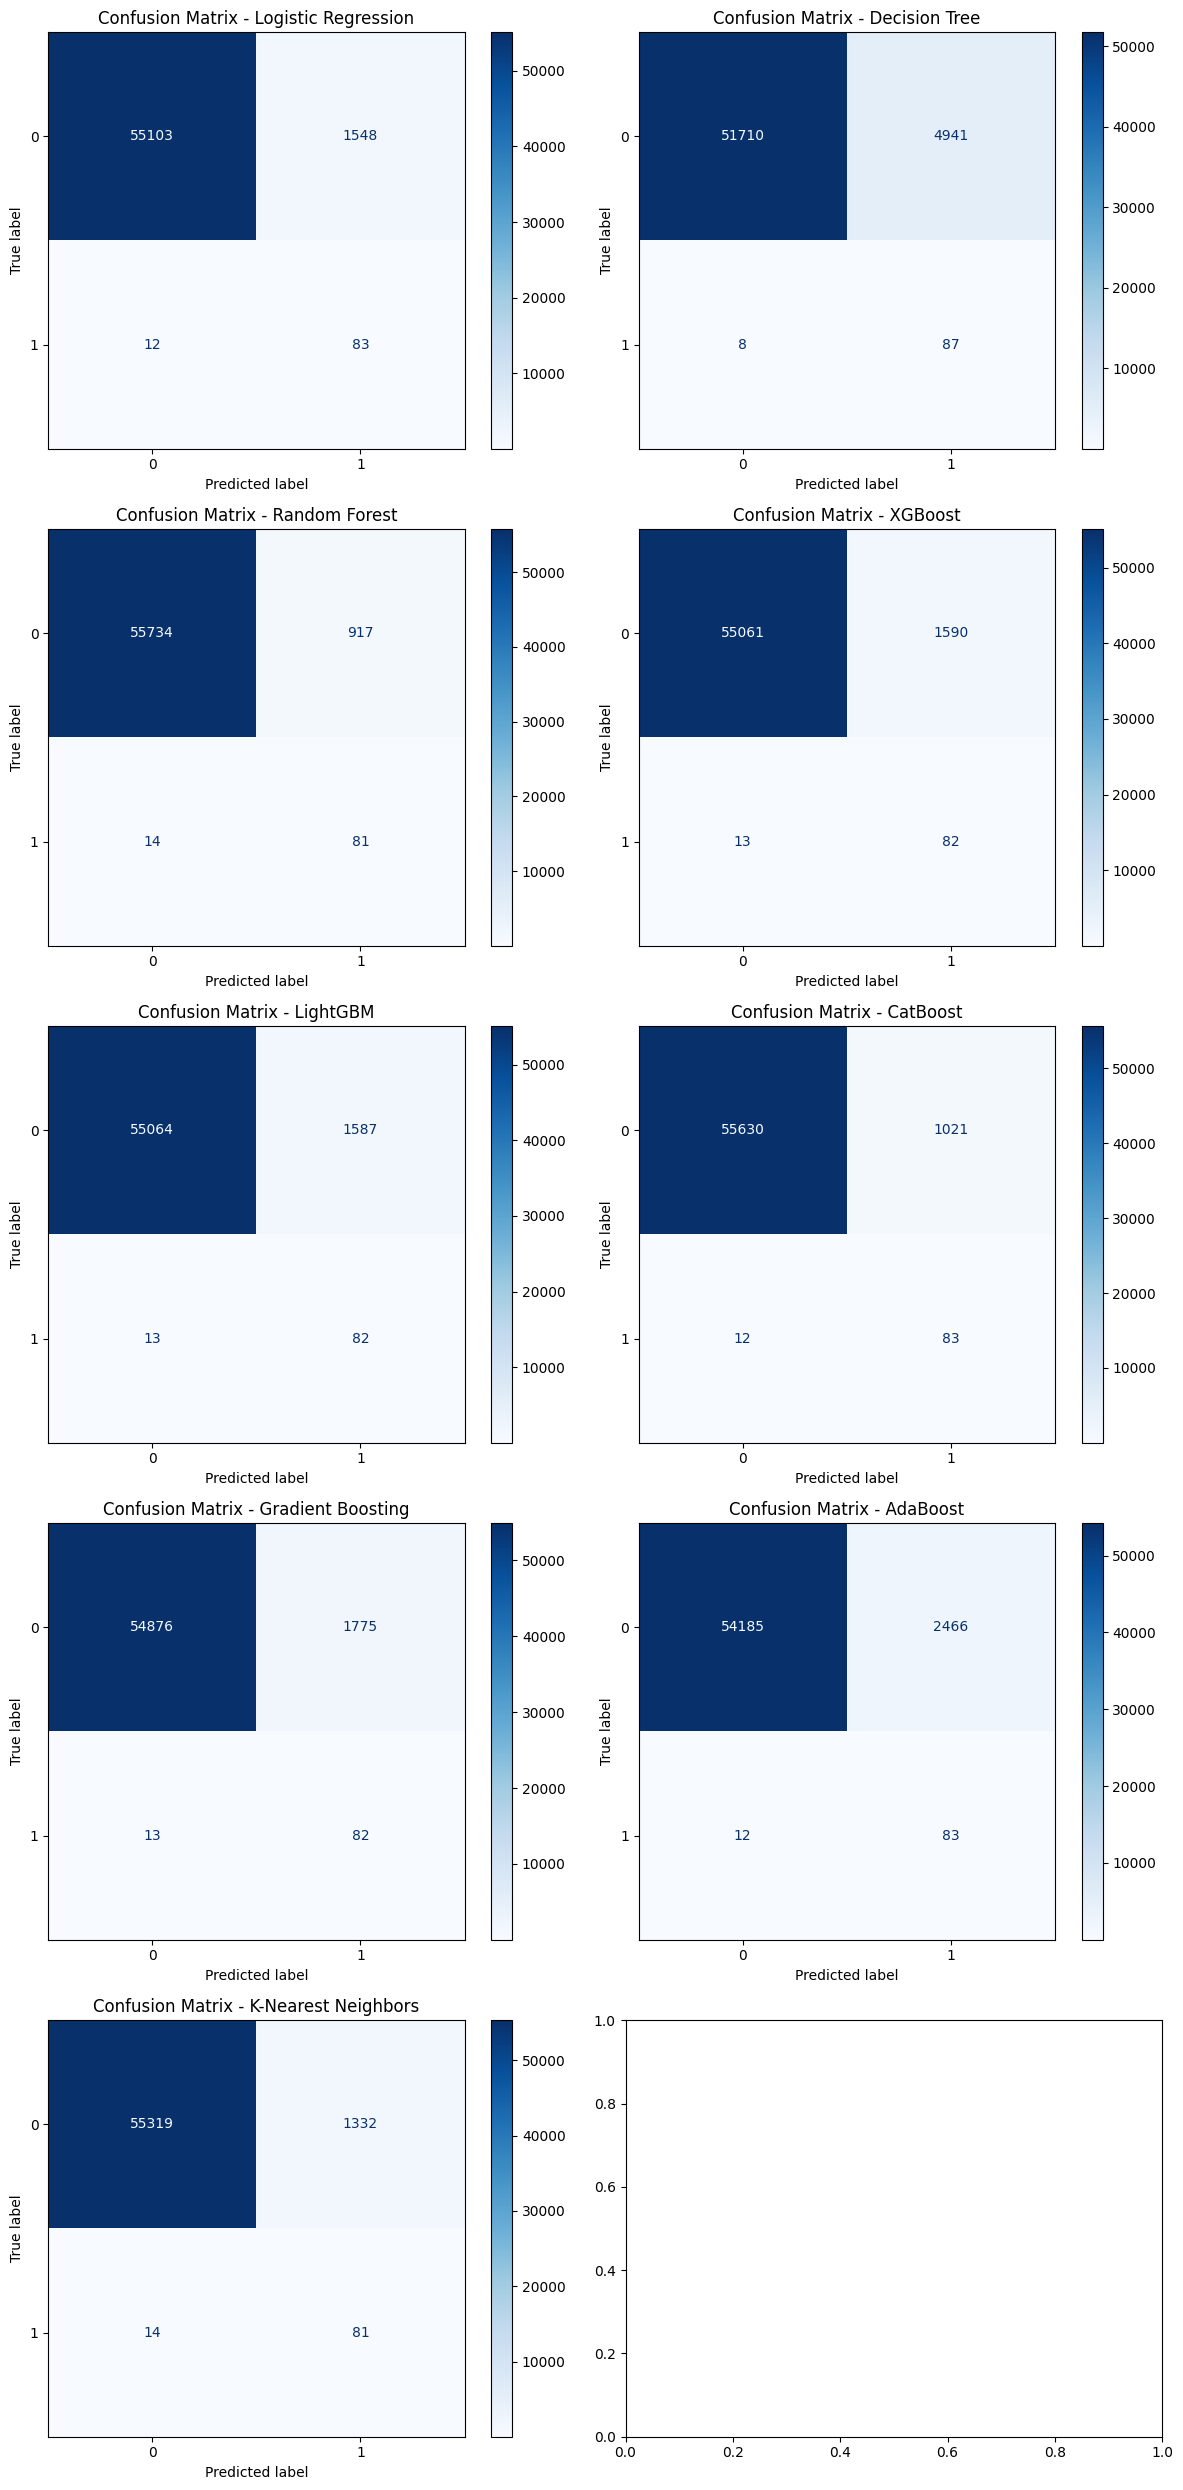

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def plot_confusion_matrices(models, X_test, y_test):
    num_models = len(models)
    rows = (num_models // 2) + (num_models % 2)

    fig, axes = plt.subplots(rows, 2, figsize=(12, rows * 5))
    axes = axes.flatten()

    for i, (name, model) in enumerate(models.items()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap="Blues", ax=axes[i])
        axes[i].set_title(f"Confusion Matrix - {name}")

    plt.tight_layout()
    plt.show()

plot_confusion_matrices(models, X_test, y_test)


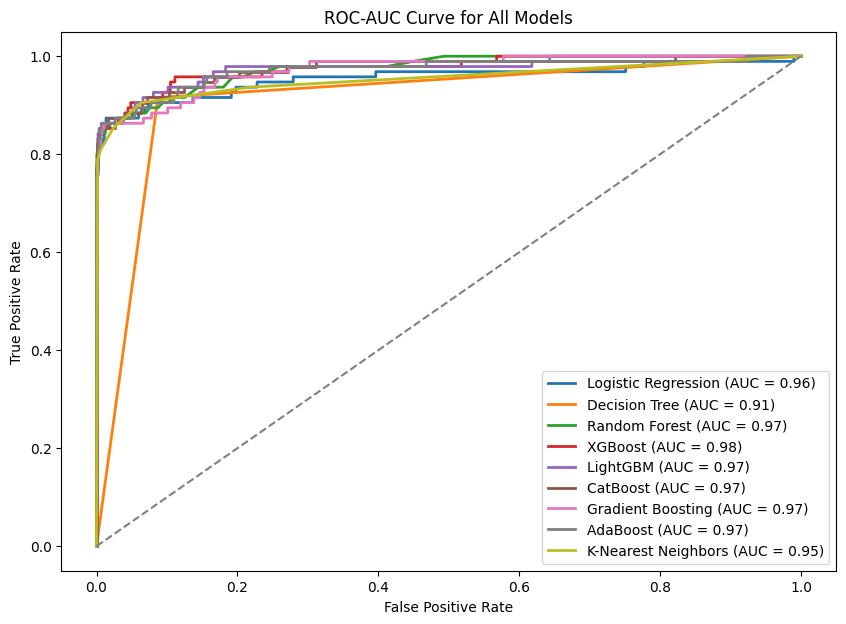

In [24]:
# AUC- Roc for each models

from sklearn.metrics import roc_curve, auc

def plot_roc_auc(models, X_test, y_test):
    plt.figure(figsize=(10, 7))

    for name, model in models.items():
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-AUC Curve for All Models")
    plt.legend(loc="lower right")
    plt.show()

plot_roc_auc(models, X_test, y_test)

HyperParameter Tuning

In [25]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Define hyperparameter grids
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    "Decision Tree": {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    "Random Forest": {
        'n_estimators': [100, 300, 500],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    "XGBoost": {
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 5, 7],
        'subsample': [0.5, 0.7, 1.0]
    },
    "LightGBM": {
        'num_leaves': [31, 50, 100],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'n_estimators': [100, 300, 500]
    },
    "CatBoost": {
        'iterations': [100, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'depth': [3, 5, 7]
    },
    "Gradient Boosting": {
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 5, 7]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
        'weights': ['uniform', 'distance']
    }
}

best_params = {}
best_scores = {}

for name, model in models.items():
    print(f"Tuning {name}...")

    if len(param_grids[name]) < 10:
        search = GridSearchCV(model, param_grids[name], scoring='f1', cv=5, n_jobs=-1)
    else:
        search = RandomizedSearchCV(model, param_distributions=param_grids[name], scoring='f1', cv=5, n_iter=10, n_jobs=-1)

    search.fit(X_train_resampled, y_train_resampled)  

    best_params[name] = search.best_params_  
    best_scores[name] = search.best_score_ 

    print(f"Best Parameters for {name}: {search.best_params_}")
    print(f"Best Score: {search.best_score_}\n")

# Convert results to DataFrame
df_results = pd.DataFrame({"Model": best_params.keys(), "Best Parameters": best_params.values(), "Best Score": best_scores.values()})


Tuning Logistic Regression...
Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best Score: 0.933334863874359

Tuning Decision Tree...
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 10}
Best Score: 0.9136207299525687

Tuning Random Forest...
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9364025092919375

Tuning XGBoost...
Best Parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 500, 'subsample': 1.0}
Best Score: 0.9398552340227138

Tuning LightGBM...
[LightGBM] [Info] Number of positive: 378, number of negative: 378
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7560
[LightGBM] [Info] Number of data points in the train set: 756, number of used features: 30
[LightGBM] [Info] [bina

In [26]:
df_results

,Model,Best Parameters,Best Score
0,Logistic Regression,"{'C': 1, 'solver': 'liblinear'}",0.933335
1,Decision Tree,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.913621
2,Random Forest,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.936403
3,XGBoost,"{'learning_rate': 0.05, 'max_depth': 7, 'n_est...",0.939855
4,LightGBM,"{'learning_rate': 0.1, 'n_estimators': 100, 'n...",0.936804
5,CatBoost,"{'depth': 3, 'iterations': 300, 'learning_rate...",0.936332
6,Gradient Boosting,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.936431
7,AdaBoost,"{'learning_rate': 0.1, 'n_estimators': 50}",0.932025
8,K-Nearest Neighbors,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.934243
